In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/CLEAN__FITPULSE__DATA__.csv")

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Rename 'Id' column to 'user_id' to prevent KeyErrors
df = df.rename(columns={'Id': 'user_id'})

# Verify column names
print(df.columns)

# Convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort values
df = df.sort_values('timestamp')

df.head()

Index(['timestamp', 'id', 'heart_rate', 'age', 'activity_type',
       'duration_minutes', 'intensity', 'calories_burned', 'avg_heart_rate',
       'resting_heart_rate', 'hours_sleep', 'stress_level', 'daily_steps',
       'hydration_level', 'blood_pressure_systolic',
       'blood_pressure_diastolic', 'fitness_level'],
      dtype='object')


,timestamp,id,heart_rate,age,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate,resting_heart_rate,hours_sleep,stress_level,daily_steps,hydration_level,blood_pressure_systolic,blood_pressure_diastolic,fitness_level
0,2024-01-01 00:00:00+00:00,1,69,56,Walking,12,Medium,83,140,69,8.0,Low,12091,Good,122,88,Beginner
1,2024-01-01 00:01:00+00:00,1,66,46,Gym,86,High,66,143,65,6.8,Low,4504,Poor,120,81,Intermediate
348,2024-01-01 00:01:00+00:00,4,66,46,Gym,86,High,66,143,65,6.8,Low,4504,Poor,120,81,Intermediate
2,2024-01-01 00:02:00+00:00,1,67,32,Yoga,101,Low,202,132,64,4.2,High,12964,Average,120,68,Beginner
3,2024-01-01 00:03:00+00:00,1,68,25,Gym,71,Medium,427,97,57,7.2,Medium,11346,Average,142,69,Advanced


In [2]:
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.tz_localize(None)


In [3]:
df.tail()

,timestamp,id,heart_rate,age,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate,resting_heart_rate,hours_sleep,stress_level,daily_steps,hydration_level,blood_pressure_systolic,blood_pressure_diastolic,fitness_level
505,2024-01-01 06:45:00,5,86,98,17,6,59,38,70,68,5.2,1,25,3.23,130,85,Medium
506,2024-01-01 06:46:00,5,98,9,4,31,11,87,87,69,5.2,3,23,3.23,114,69,Low
507,2024-01-01 06:47:00,5,66,21,35,32,66,21,70,88,5.2,4,31,3.23,124,73,Medium
508,2024-01-01 06:48:00,5,71,47,2,51,88,68,95,78,5.2,5,7,3.23,133,83,Medium
509,2024-01-01 06:49:00,5,98,52,5,4,68,54,91,68,5.2,2,31,3.23,117,83,Medium


In [4]:
!pip install tsfresh


In [5]:
from tsfresh import extract_features

tsfresh_df = df[['id', 'timestamp', 'heart_rate', 'daily_steps', 'hours_sleep']]

In [6]:
extracted_features = extract_features(
    tsfresh_df,
    column_id="id",
    column_sort="timestamp"
)

extracted_features.head()

Feature Extraction: 100%|██████████| 15/15 [00:04<00:00,  3.54it/s]


,heart_rate__variance_larger_than_standard_deviation,heart_rate__has_duplicate_max,heart_rate__has_duplicate_min,heart_rate__has_duplicate,heart_rate__sum_values,heart_rate__abs_energy,heart_rate__mean_abs_change,heart_rate__mean_change,heart_rate__mean_second_derivative_central,heart_rate__median,...,hours_sleep__fourier_entropy__bins_5,hours_sleep__fourier_entropy__bins_10,hours_sleep__fourier_entropy__bins_100,hours_sleep__permutation_entropy__dimension_3__tau_1,hours_sleep__permutation_entropy__dimension_4__tau_1,hours_sleep__permutation_entropy__dimension_5__tau_1,hours_sleep__permutation_entropy__dimension_6__tau_1,hours_sleep__permutation_entropy__dimension_7__tau_1,hours_sleep__query_similarity_count__query_None__threshold_0.0,hours_sleep__mean_n_absolute_max__number_of_maxima_7
1,1.0,1.0,1.0,1.0,8870.0,748322.0,1.735849,0.207547,0.019048,82.0,...,1.309129,1.935338,3.420800,1.785954,3.072835,4.091019,4.557017,4.615121,NaN,8.871429
2,1.0,1.0,1.0,1.0,8784.0,757164.0,2.087379,-0.165049,0.000000,84.5,...,0.849037,1.424709,3.054303,1.780046,3.132215,4.164954,4.463808,4.570822,NaN,8.928571
3,1.0,1.0,1.0,1.0,11152.0,949988.0,2.924242,0.045455,-0.022901,83.0,...,1.044157,1.609816,3.348149,1.726357,3.009177,4.227433,4.685486,4.811440,NaN,8.828571
4,1.0,0.0,1.0,1.0,4548.0,376222.0,7.381818,0.254545,-0.037037,79.5,...,1.168346,1.828879,3.080476,1.778278,3.057764,3.727905,3.904643,3.912023,NaN,8.585714
5,1.0,0.0,1.0,1.0,8937.0,739765.0,14.238532,0.165138,0.050926,83.0,...,0.178831,0.178831,0.178831,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,5.200000


In [7]:
from scipy.stats import skew, kurtosis

stats_features = df.groupby('id').agg(
    hr_mean=('heart_rate', 'mean'),
    hr_std=('heart_rate', 'std'),
    hr_skew=('heart_rate', skew),
    hr_kurtosis=('heart_rate', kurtosis),

    steps_mean=('daily_steps', 'mean'),
    steps_std=('daily_steps', 'std'),

    sleep_mean=('hours_sleep', 'mean')
)

stats_features.head()

,hr_mean,hr_std,hr_skew,hr_kurtosis,steps_mean,steps_std,sleep_mean
id,,,,,,,
1,82.897196,11.084525,0.190691,-1.054570,8732.373832,3677.811151,6.516822
2,84.461538,12.169453,-0.025003,-1.358931,8561.250000,4065.117034,6.452885
3,83.849624,10.623371,0.109025,-1.023106,8490.082707,3909.234929,6.405263
4,81.214286,11.167671,0.236625,-0.989643,8875.500000,3479.003854,6.350000
5,81.245455,11.200579,-0.253477,-0.965599,18.772727,10.666469,5.200000


In [8]:
final_features = extracted_features.join(stats_features)
final_features.head()


,heart_rate__variance_larger_than_standard_deviation,heart_rate__has_duplicate_max,heart_rate__has_duplicate_min,heart_rate__has_duplicate,heart_rate__sum_values,heart_rate__abs_energy,heart_rate__mean_abs_change,heart_rate__mean_change,heart_rate__mean_second_derivative_central,heart_rate__median,...,hours_sleep__permutation_entropy__dimension_7__tau_1,hours_sleep__query_similarity_count__query_None__threshold_0.0,hours_sleep__mean_n_absolute_max__number_of_maxima_7,hr_mean,hr_std,hr_skew,hr_kurtosis,steps_mean,steps_std,sleep_mean
1,1.0,1.0,1.0,1.0,8870.0,748322.0,1.735849,0.207547,0.019048,82.0,...,4.615121,NaN,8.871429,82.897196,11.084525,0.190691,-1.054570,8732.373832,3677.811151,6.516822
2,1.0,1.0,1.0,1.0,8784.0,757164.0,2.087379,-0.165049,0.000000,84.5,...,4.570822,NaN,8.928571,84.461538,12.169453,-0.025003,-1.358931,8561.250000,4065.117034,6.452885
3,1.0,1.0,1.0,1.0,11152.0,949988.0,2.924242,0.045455,-0.022901,83.0,...,4.811440,NaN,8.828571,83.849624,10.623371,0.109025,-1.023106,8490.082707,3909.234929,6.405263
4,1.0,0.0,1.0,1.0,4548.0,376222.0,7.381818,0.254545,-0.037037,79.5,...,3.912023,NaN,8.585714,81.214286,11.167671,0.236625,-0.989643,8875.500000,3479.003854,6.350000
5,1.0,0.0,1.0,1.0,8937.0,739765.0,14.238532,0.165138,0.050926,83.0,...,-0.000000,NaN,5.200000,81.245455,11.200579,-0.253477,-0.965599,18.772727,10.666469,5.200000


In [9]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
selected_features = selector.fit_transform(final_features.fillna(0))

selected_features.shape


(5, 1612)

In [10]:
import pandas as pd
import numpy as np

features = final_features.fillna(0)
features.head()


,heart_rate__variance_larger_than_standard_deviation,heart_rate__has_duplicate_max,heart_rate__has_duplicate_min,heart_rate__has_duplicate,heart_rate__sum_values,heart_rate__abs_energy,heart_rate__mean_abs_change,heart_rate__mean_change,heart_rate__mean_second_derivative_central,heart_rate__median,...,hours_sleep__permutation_entropy__dimension_7__tau_1,hours_sleep__query_similarity_count__query_None__threshold_0.0,hours_sleep__mean_n_absolute_max__number_of_maxima_7,hr_mean,hr_std,hr_skew,hr_kurtosis,steps_mean,steps_std,sleep_mean
1,1.0,1.0,1.0,1.0,8870.0,748322.0,1.735849,0.207547,0.019048,82.0,...,4.615121,0.0,8.871429,82.897196,11.084525,0.190691,-1.054570,8732.373832,3677.811151,6.516822
2,1.0,1.0,1.0,1.0,8784.0,757164.0,2.087379,-0.165049,0.000000,84.5,...,4.570822,0.0,8.928571,84.461538,12.169453,-0.025003,-1.358931,8561.250000,4065.117034,6.452885
3,1.0,1.0,1.0,1.0,11152.0,949988.0,2.924242,0.045455,-0.022901,83.0,...,4.811440,0.0,8.828571,83.849624,10.623371,0.109025,-1.023106,8490.082707,3909.234929,6.405263
4,1.0,0.0,1.0,1.0,4548.0,376222.0,7.381818,0.254545,-0.037037,79.5,...,3.912023,0.0,8.585714,81.214286,11.167671,0.236625,-0.989643,8875.500000,3479.003854,6.350000
5,1.0,0.0,1.0,1.0,8937.0,739765.0,14.238532,0.165138,0.050926,83.0,...,-0.000000,0.0,5.200000,81.245455,11.200579,-0.253477,-0.965599,18.772727,10.666469,5.200000


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)


In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_features)


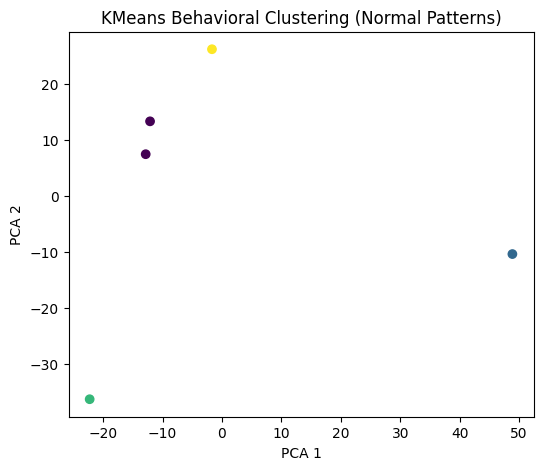

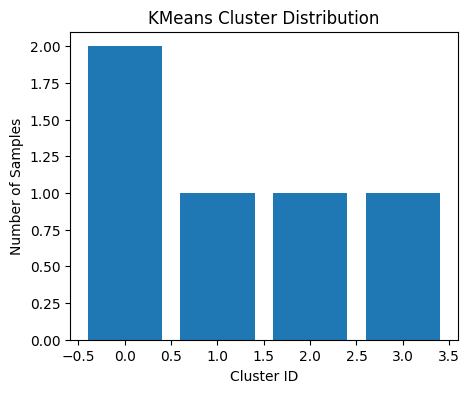

In [14]:
import matplotlib.pyplot as plt

# PCA Scatter
plt.figure(figsize=(6,5))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Behavioral Clustering (Normal Patterns)")
plt.show()

# Cluster distribution
unique, counts = np.unique(kmeans_labels, return_counts=True)

plt.figure(figsize=(5,4))
plt.bar(unique, counts)
plt.xlabel("Cluster ID")
plt.ylabel("Number of Samples")
plt.title("KMeans Cluster Distribution")
plt.show()



In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=3)
dbscan_labels = dbscan.fit_predict(pca_features)


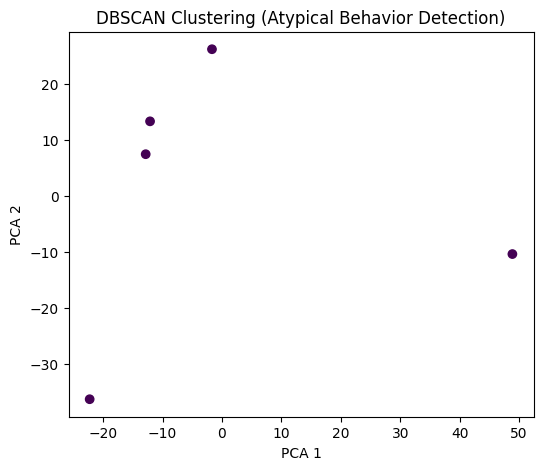

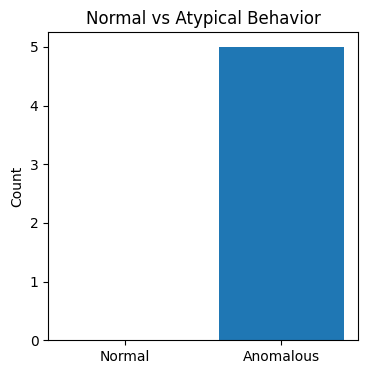

In [16]:
# PCA Scatter with anomalies
plt.figure(figsize=(6,5))
plt.scatter(
    pca_features[:, 0],
    pca_features[:, 1],
    c=dbscan_labels
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("DBSCAN Clustering (Atypical Behavior Detection)")
plt.show()

# Anomaly count
anomalies = np.sum(dbscan_labels == -1)

plt.figure(figsize=(4,4))
plt.bar(["Normal", "Anomalous"], [len(dbscan_labels)-anomalies, anomalies])
plt.title("Normal vs Atypical Behavior")
plt.ylabel("Count")
plt.show()

In [17]:
np.unique(dbscan_labels, return_counts=True)


(array([-1]), array([5]))

In [18]:
!pip install prophet


In [19]:
hourly_data = df.resample('H', on='timestamp').mean(numeric_only=True).reset_index()
hourly_data.head()

/tmp/ipython-input-2789744369.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df.resample('H', on='timestamp').mean(numeric_only=True).reset_index()


,timestamp,id,heart_rate,age,duration_minutes,calories_burned,avg_heart_rate,resting_heart_rate,hours_sleep,daily_steps,blood_pressure_systolic,blood_pressure_diastolic
0,2024-01-01 00:00:00,1.722892,80.710843,36.963855,57.578313,346.975904,112.469880,68.638554,6.384337,9562.253012,126.156627,76.843373
1,2024-01-01 01:00:00,1.666667,86.413333,37.773333,62.120000,392.906667,114.866667,71.213333,6.673333,8533.680000,124.400000,75.573333
2,2024-01-01 02:00:00,2.333333,80.371795,41.807692,65.320513,348.833333,115.141026,67.256410,6.335897,7768.256410,123.269231,76.987179
3,2024-01-01 03:00:00,2.817073,87.097561,39.256098,61.585366,381.329268,115.402439,69.256098,6.497561,8914.621951,126.219512,75.548780
4,2024-01-01 04:00:00,3.134146,82.475610,38.634146,63.804878,359.121951,110.731707,68.719512,6.323171,8296.670732,125.573171,77.073171


In [20]:
from prophet import Prophet

hr_df = hourly_data[['timestamp', 'heart_rate']]
hr_df.columns = ['ds', 'y']

In [21]:
import pandas as pd
from prophet import Prophet

if pd.api.types.is_datetime64_any_dtype(hr_df['ds']):
    if hr_df['ds'].dt.tz is not None:
        hr_df['ds'] = hr_df['ds'].dt.tz_localize(None)

if hr_df['y'].isnull().sum() >= len(hr_df) - 1:
    hr_df_cleaned = hr_df.dropna(subset=['y']).copy()
    if len(hr_df_cleaned) < 2:
        raise ValueError("Dataframe has less than 2 non-NaN rows in 'y' after cleanup. Prophet cannot fit.")
    hr_model = Prophet()
    hr_model.fit(hr_df_cleaned)
else:
    hr_model = Prophet()
    hr_model.fit(hr_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.


In [22]:
hr_future = hr_model.make_future_dataframe(periods=7)
hr_forecast = hr_model.predict(hr_future)


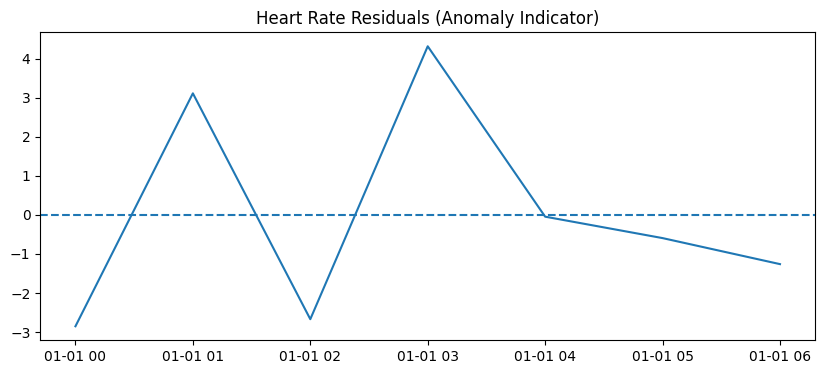

In [23]:
hr_results = hr_df.copy()
hr_results['yhat'] = hr_forecast['yhat'].iloc[:len(hr_df)]
hr_results['residual'] = hr_results['y'] - hr_results['yhat']

plt.figure(figsize=(10,4))
plt.plot(hr_results['ds'], hr_results['residual'])
plt.axhline(0, linestyle='--')
plt.title("Heart Rate Residuals (Anomaly Indicator)")
plt.show()

In [24]:
steps_df = hourly_data[['timestamp', 'daily_steps']]
steps_df.columns = ['ds', 'y']

In [25]:
steps_model = Prophet()
steps_model.fit(steps_df)

steps_future = steps_model.make_future_dataframe(periods=7)
steps_forecast = steps_model.predict(steps_future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.


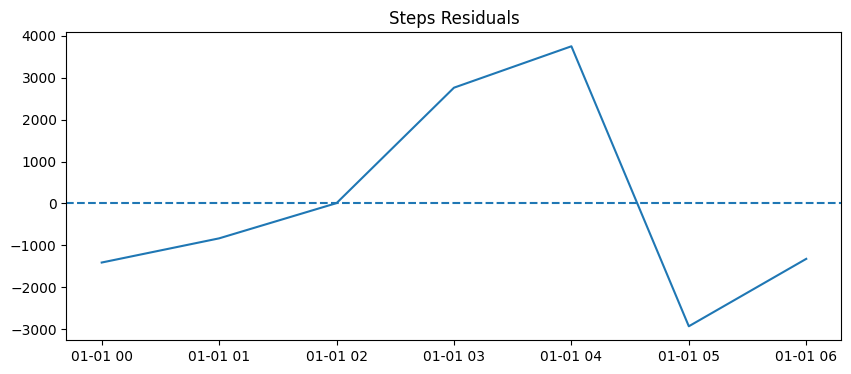

In [26]:
steps_results = steps_df.copy()
steps_results['yhat'] = steps_forecast['yhat'].iloc[:len(steps_df)] # Ensure same length
steps_results['residual'] = steps_results['y'] - steps_results['yhat']

plt.figure(figsize=(10,4))
plt.plot(steps_results['ds'], steps_results['residual'])
plt.axhline(0, linestyle='--')
plt.title("Steps Residuals")
plt.show()

In [27]:
sleep_df = hourly_data[['timestamp', 'hours_sleep']]
sleep_df.columns = ['ds', 'y']

In [28]:
sleep_model = Prophet()
sleep_model.fit(sleep_df)

sleep_future = sleep_model.make_future_dataframe(periods=7)
sleep_forecast = sleep_model.predict(sleep_future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.


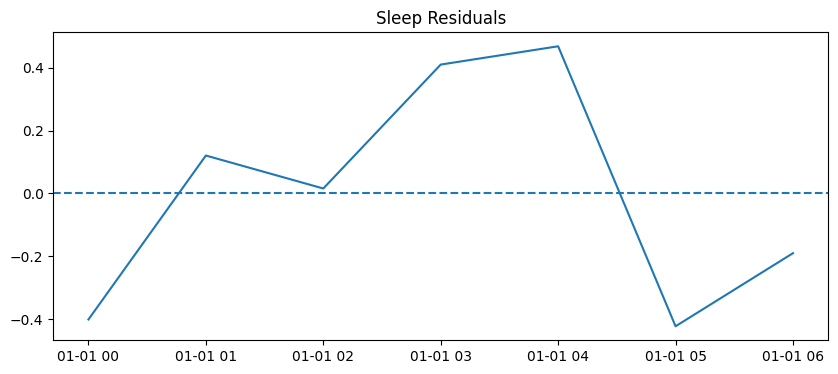

In [29]:
sleep_results = sleep_df.copy()
sleep_results['yhat'] = sleep_forecast['yhat'].iloc[:len(sleep_df)]
sleep_results['residual'] = sleep_results['y'] - sleep_results['yhat']

plt.figure(figsize=(10,4))
plt.plot(sleep_results['ds'], sleep_results['residual'])
plt.axhline(0, linestyle='--')
plt.title("Sleep Residuals")
plt.show()